In [230]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os

mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = False

### Loading datasets

#### Loading binance dataset

In [393]:
binance_df = pd.DataFrame()

binance_symbols = ["BTCBUSD", "ETHBUSD", "XRPBUSD", "BCHBUSD", "LTCBUSD", "XLMBUSD", "ADABUSD"]

for ratio in binance_symbols:
    
    dataset = "crypto_data/"+ratio+"-1m-data.csv"
    df = pd.read_csv(dataset, index_col="timestamp")
    df.rename(columns={"close": f"{ratio}_close"}, inplace=True)

    df = df[[f"{ratio}_close"]]
    df = df[:568700]
    
    
    if len(binance_df) == 0:
        binance_df = df
    else:
        binance_df = binance_df.join(df, on='timestamp')


#### Loading crated dataset

In [4]:
path = 'crypto_data/my_dataset_csv.csv'               

my_df = pd.read_csv(path)  
my_df = my_df.dropna()

#### Loading downloaded dataset

In [394]:
main_df = pd.DataFrame()

ratios = ["BTC-USD", "LTC-USD","ETH-USD","BCH-USD"]

for ratio in ratios:
    dataset = "crypto_data/"+ratio+".csv"
    df = pd.read_csv(dataset, names=["time","low","high","open","close","volume"])
    
    df.rename(columns={"close": f"{ratio}_close"}, inplace=True)
    
    df.set_index("time", inplace=True)
    df = df[[f"{ratio}_close"]]
    
    if len(main_df) == 0:
        main_df = df
    else:
        main_df = main_df.join(df)


### Problem !

In [427]:
def split_dataset(df):
    
    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]
    
    return train_df, val_df, test_df

In [428]:
train_df_d, val_df_d, test_df_d = split_dataset(main_df)

In [429]:
scaler_d = StandardScaler()

In [430]:
train_df_d = pd.DataFrame(scaler_d.fit_transform(train_df_d),columns = train_df_d.columns)
val_df_d = pd.DataFrame(scaler_d.transform(val_df_d),columns = val_df_d.columns)
test_df_d = pd.DataFrame(scaler_d.transform(test_df_d),columns = test_df_d.columns)

<AxesSubplot:>

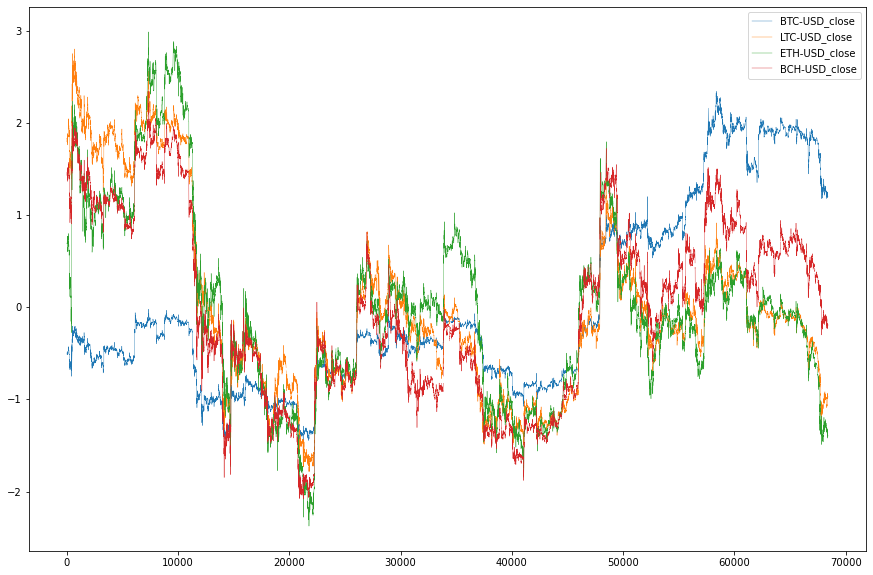

In [431]:
train_df_d.plot(linewidth=0.4)

<AxesSubplot:>

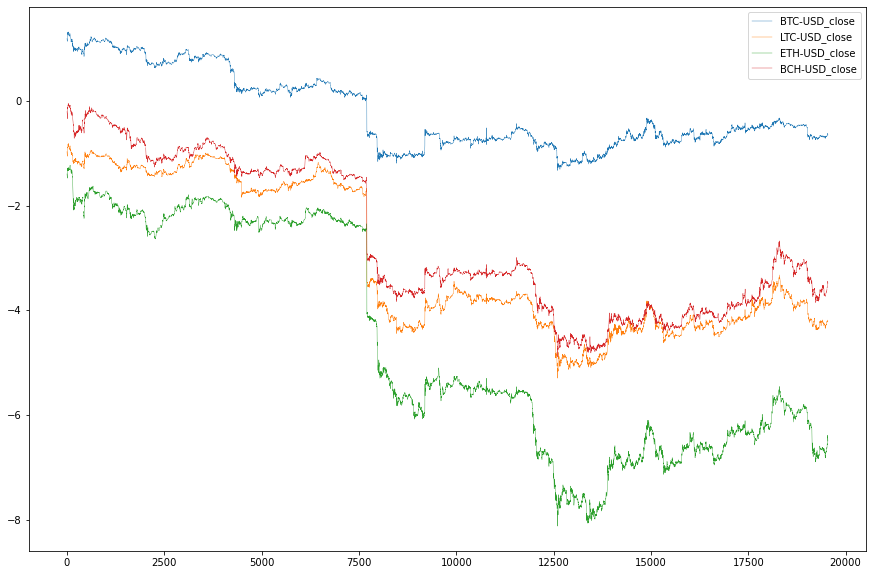

In [432]:
val_df_d.plot(linewidth=0.4)

<AxesSubplot:>

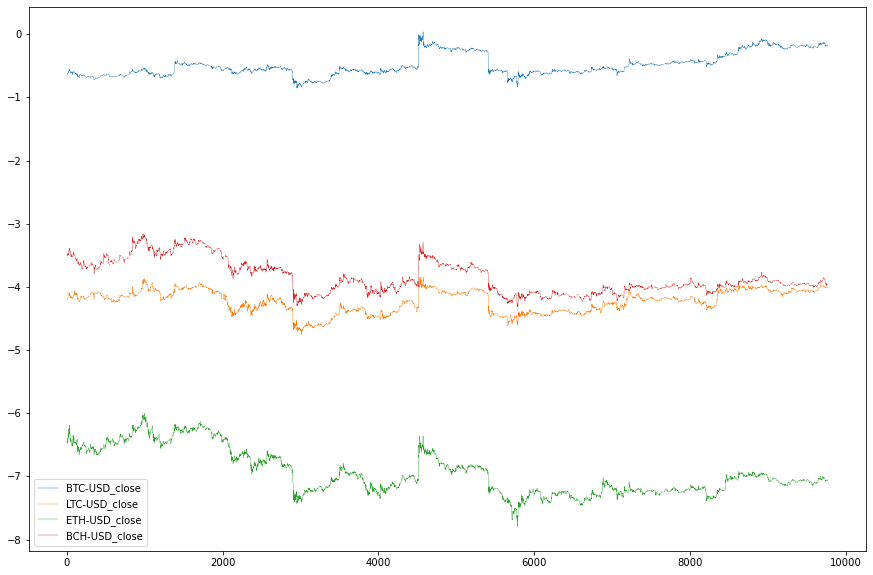

In [435]:
test_df_d.plot(linewidth=0.4)

In [437]:
val_df_d = pd.DataFrame(scaler_d.fit_transform(val_df_d),columns = val_df_d.columns)

<AxesSubplot:>

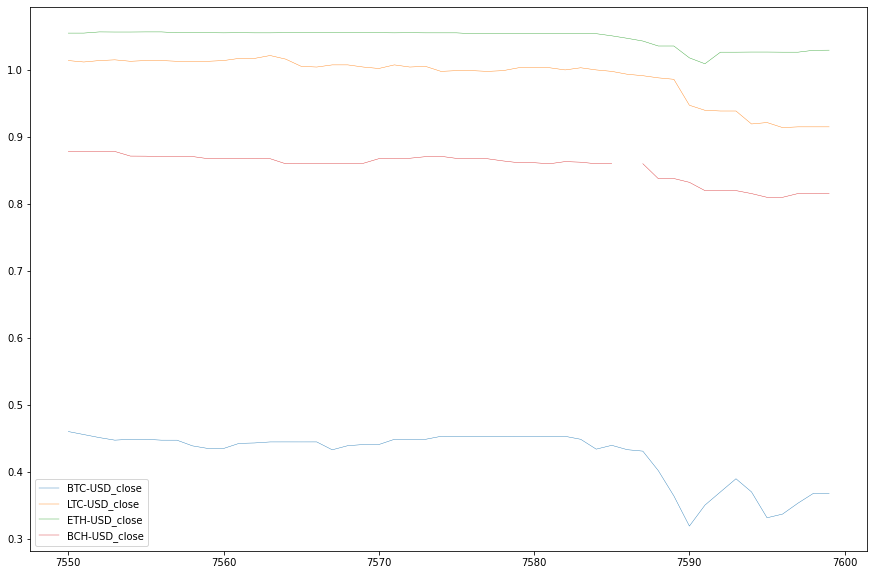

In [443]:
val_df_d[7550:7600].plot(linewidth=0.4)

### Exploring datasets

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

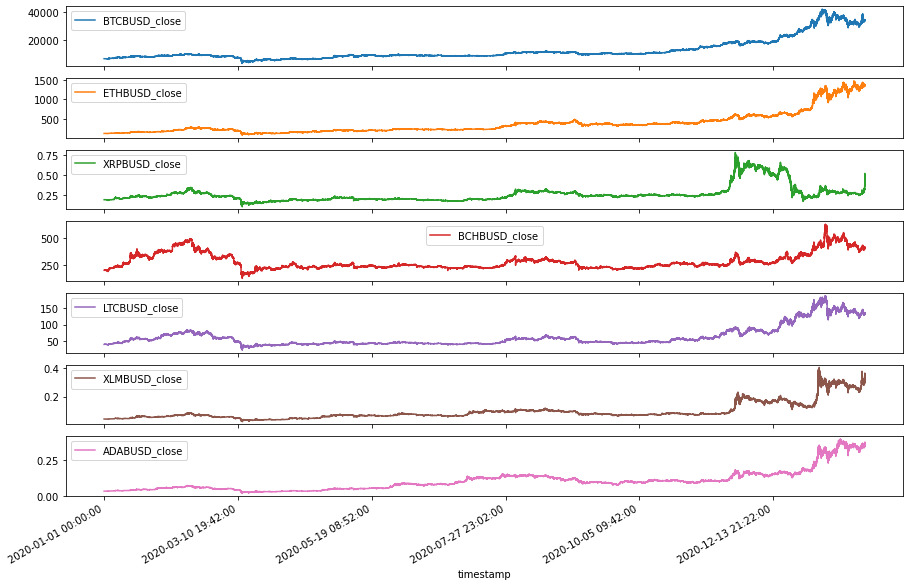

In [395]:
binance_df.plot(subplots=True)

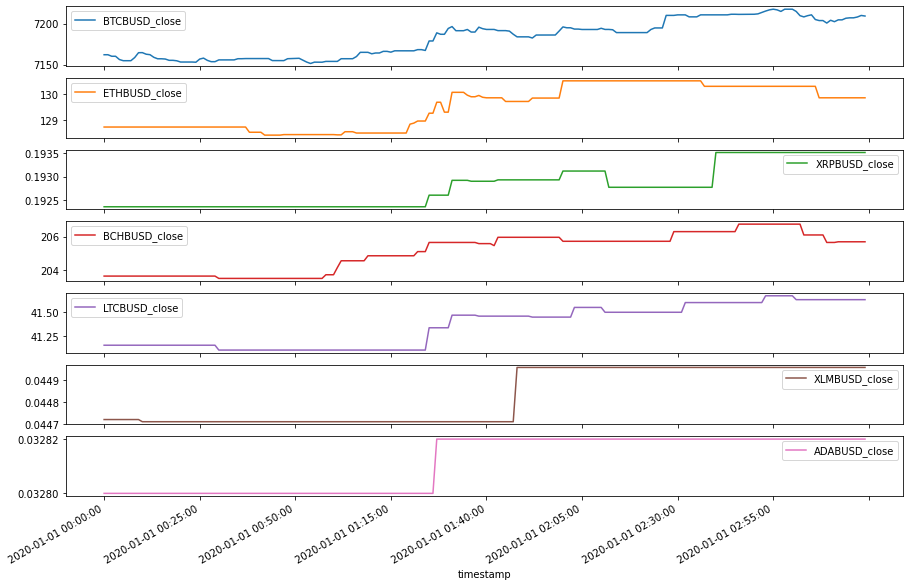

In [144]:
binance_df[:200].plot(subplots=True)
plt.show()

Data arent quite good at the beginning that why I will remove some part of it 

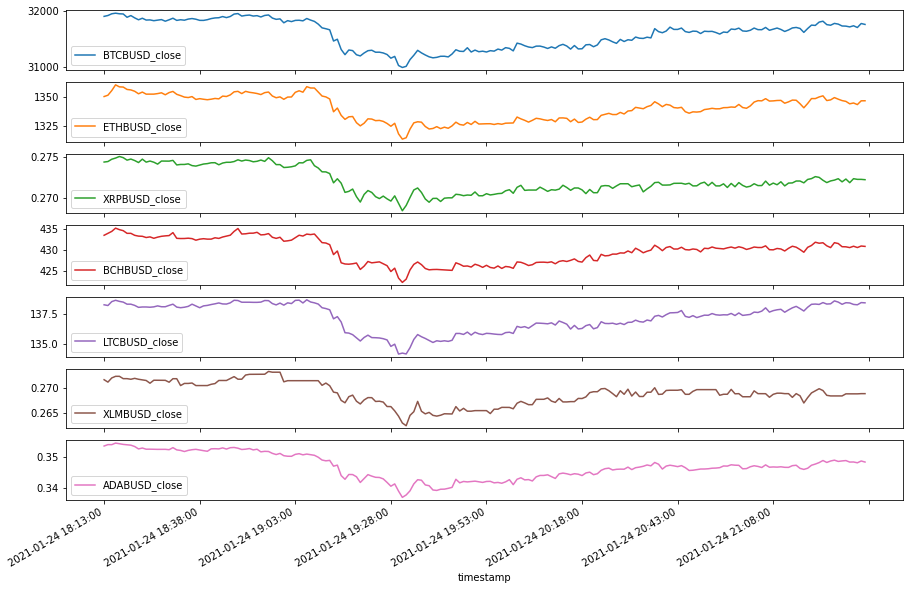

In [163]:
binance_df[280000:280200].plot(subplots=True)
plt.show()

In [367]:
binance_df[:100000]

,BTCBUSD_close,ETHBUSD_close,BCHBUSD_close,LTCBUSD_close,XLMBUSD_close,ADABUSD_close
timestamp,,,,,,
2020-07-14 01:42:00,9235.24,239.91,231.35,43.82,0.09006,0.12545
2020-07-14 01:43:00,9233.12,239.77,231.35,43.82,0.08987,0.12541
2020-07-14 01:44:00,9231.93,239.67,231.36,43.82,0.08987,0.12541
2020-07-14 01:45:00,9231.05,239.65,231.36,43.82,0.08987,0.12539
2020-07-14 01:46:00,9233.18,239.65,231.36,43.82,0.08987,0.12555
...,...,...,...,...,...,...
2020-09-21 12:17:00,10601.93,347.37,215.79,44.47,0.07171,0.08113
2020-09-21 12:18:00,10597.36,347.62,215.79,44.50,0.07165,0.08121
2020-09-21 12:19:00,10578.43,346.12,215.07,44.37,0.07165,0.08086


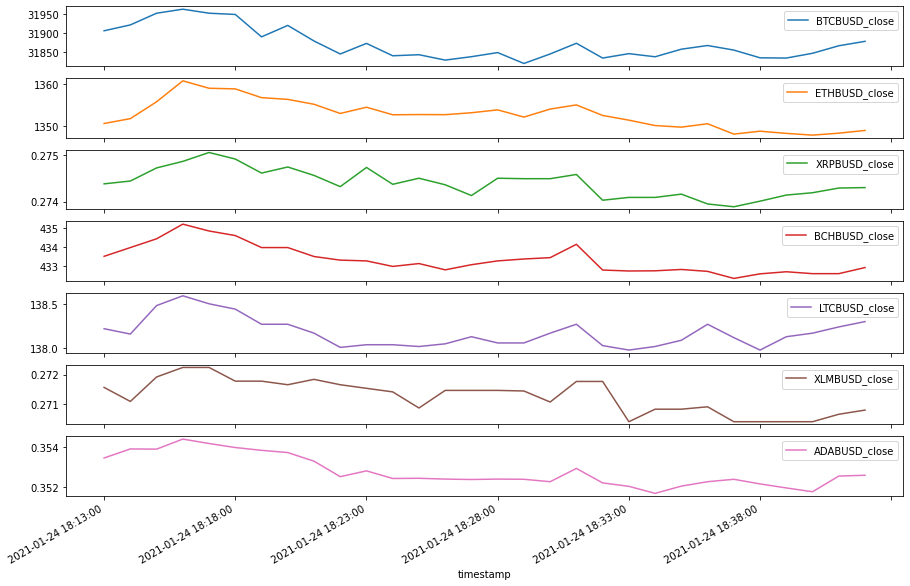

In [164]:
binance_df[280000:280030].plot(subplots=True)
plt.show()

In [160]:
binance_df = binance_df[280000:]

In [161]:
binance_df

,BTCBUSD_close,ETHBUSD_close,XRPBUSD_close,BCHBUSD_close,LTCBUSD_close,XLMBUSD_close,ADABUSD_close
timestamp,,,,,,,
2020-07-14 01:42:00,9235.24,239.91,0.19821,231.35,43.82,0.09006,0.12545
2020-07-14 01:43:00,9233.12,239.77,0.19792,231.35,43.82,0.08987,0.12541
2020-07-14 01:44:00,9231.93,239.67,0.19792,231.36,43.82,0.08987,0.12541
2020-07-14 01:45:00,9231.05,239.65,0.19792,231.36,43.82,0.08987,0.12539
2020-07-14 01:46:00,9233.18,239.65,0.19792,231.36,43.82,0.08987,0.12555
...,...,...,...,...,...,...,...
2021-01-30 19:08:00,34368.96,1377.09,0.40199,414.47,133.63,0.31528,0.36073
2021-01-30 19:09:00,34399.69,1378.66,0.40678,414.62,133.68,0.31616,0.36046
2021-01-30 19:10:00,34395.91,1377.41,0.41377,414.39,133.56,0.31539,0.36005


In [182]:
binance_df.XRPBUSD_close.corr(binance_df.XLMBUSD_close)

0.37198895723430353

In [169]:
list(binance_df.columns)

['BTCBUSD_close',
 'ETHBUSD_close',
 'XRPBUSD_close',
 'BCHBUSD_close',
 'LTCBUSD_close',
 'XLMBUSD_close',
 'ADABUSD_close']

#### Correlation between columns

In [180]:
def get_corr(column, df):
    
    correlations = []
    
    for col in list(binance_df.columns):
        
        if column != col:
            
            corr_pair = df[column].corr(df[col])
            corr_string = "Corr {}/{} is {}".format(column, col, corr_pair)
            correlations.append(corr_string)
    
    print(correlations)

In [181]:
get_corr("BTCBUSD_close", binance_df)

['Corr BTCBUSD_close/ETHBUSD_close is 0.9575291431111431', 'Corr BTCBUSD_close/XRPBUSD_close is 0.20997511288737444', 'Corr BTCBUSD_close/BCHBUSD_close is 0.9106099591971669', 'Corr BTCBUSD_close/LTCBUSD_close is 0.9834123095721028', 'Corr BTCBUSD_close/XLMBUSD_close is 0.8951838261465275', 'Corr BTCBUSD_close/ADABUSD_close is 0.8920771353010225']


I was quite surprised that XLM has much higher correlation with BTC than XRP

In [399]:
binance_df = binance_df.drop('XRPBUSD_close', 1)

## Preprocessing

scaling values

In [319]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
quantile = QuantileTransformer()
power = PowerTransformer()


### Percentage change

In [378]:
binance_df_percentage = binance_df.pct_change()

In [379]:
binance_df_percentage

,BTCBUSD_close,ETHBUSD_close,BCHBUSD_close,LTCBUSD_close,XLMBUSD_close,ADABUSD_close
timestamp,,,,,,
2020-07-14 01:42:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-14 01:43:00,-0.000230,-0.000584,0.000000,0.000000,-0.002110,-0.000319
2020-07-14 01:44:00,-0.000129,-0.000417,0.000043,0.000000,0.000000,0.000000
2020-07-14 01:45:00,-0.000095,-0.000083,0.000000,0.000000,0.000000,-0.000159
2020-07-14 01:46:00,0.000231,0.000000,0.000000,0.000000,0.000000,0.001276
...,...,...,...,...,...,...
2021-01-30 19:08:00,-0.000471,-0.000552,-0.000723,-0.001047,0.004941,-0.000665
2021-01-30 19:09:00,0.000894,0.001140,0.000362,0.000374,0.002791,-0.000748
2021-01-30 19:10:00,-0.000110,-0.000907,-0.000555,-0.000898,-0.002435,-0.001137


In [380]:
binance_df_percentage.describe()

,BTCBUSD_close,ETHBUSD_close,BCHBUSD_close,LTCBUSD_close,XLMBUSD_close,ADABUSD_close
count,288699.000000,288699.000000,288699.000000,288699.000000,288699.000000,288699.000000
mean,0.000005,0.000007,0.000003,0.000005,0.000007,0.000005
std,0.001094,0.001469,0.001645,0.001719,0.002337,0.001920
min,-0.036244,-0.084803,-0.107953,-0.050904,-0.063424,-0.042458
25%,-0.000364,-0.000536,-0.000487,-0.000474,0.000000,-0.000560
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000364,0.000541,0.000493,0.000484,0.000000,0.000590
max,0.033410,0.058486,0.053971,0.058623,0.071819,0.065333


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

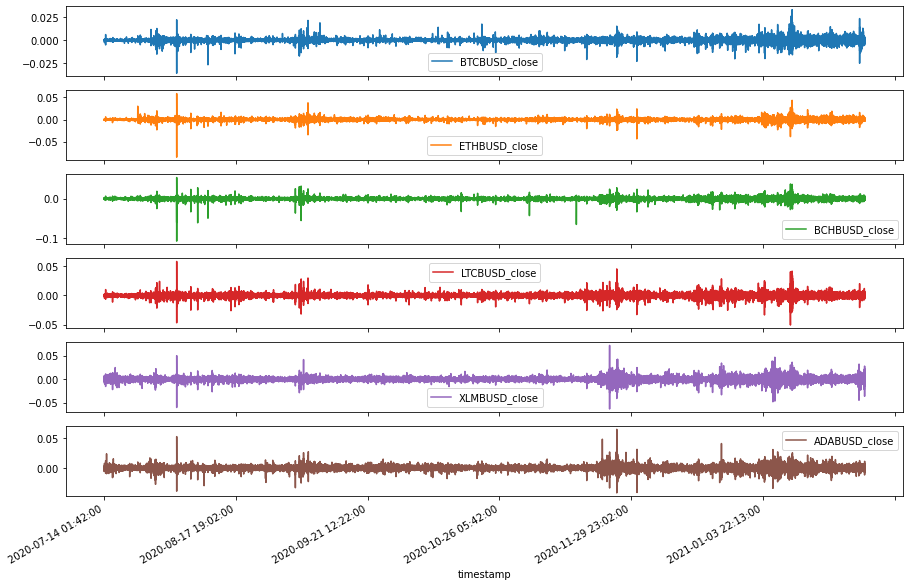

In [381]:
binance_df_percentage.plot(subplots=True)

<AxesSubplot:xlabel='timestamp'>

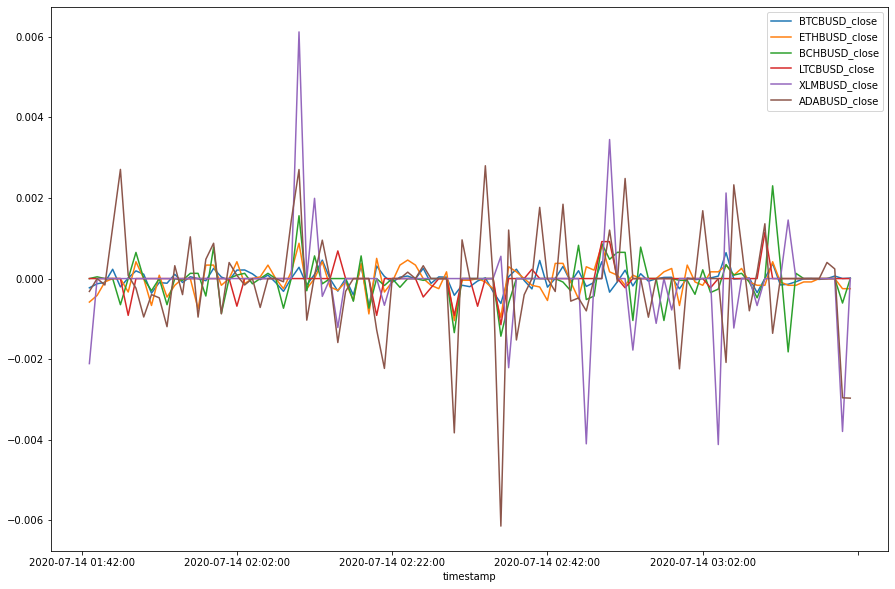

In [382]:
binance_df_percentage[:100].plot()

In [383]:
binance_df_percentage.describe()

,BTCBUSD_close,ETHBUSD_close,BCHBUSD_close,LTCBUSD_close,XLMBUSD_close,ADABUSD_close
count,288699.000000,288699.000000,288699.000000,288699.000000,288699.000000,288699.000000
mean,0.000005,0.000007,0.000003,0.000005,0.000007,0.000005
std,0.001094,0.001469,0.001645,0.001719,0.002337,0.001920
min,-0.036244,-0.084803,-0.107953,-0.050904,-0.063424,-0.042458
25%,-0.000364,-0.000536,-0.000487,-0.000474,0.000000,-0.000560
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000364,0.000541,0.000493,0.000484,0.000000,0.000590
max,0.033410,0.058486,0.053971,0.058623,0.071819,0.065333


In [384]:
scaled_bin_percentage_df_min_max = pd.DataFrame(standard_scaler.fit_transform(binance_df_percentage),columns = binance_df_percentage.columns)

<AxesSubplot:>

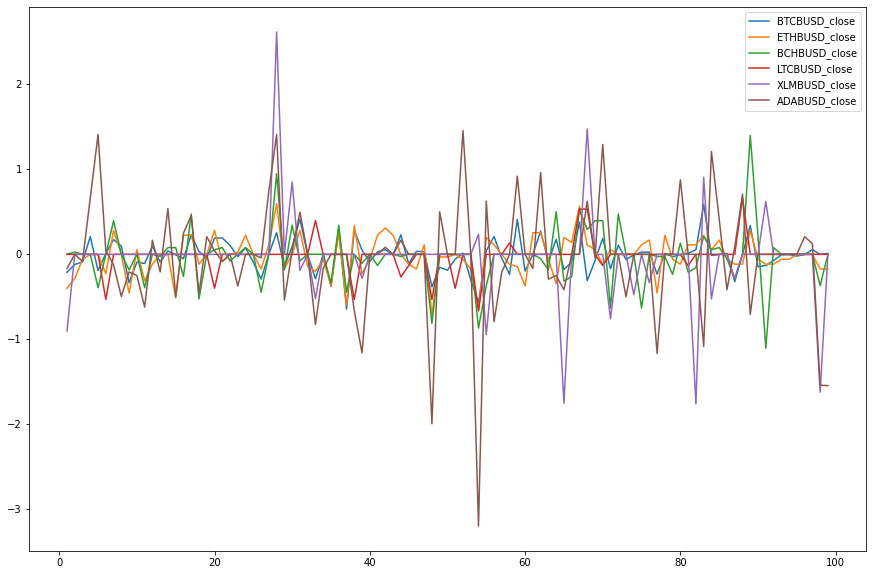

In [385]:
scaled_bin_percentage_df_min_max[:100].plot()

In [375]:
scaled_bin_percentage_df_min_max.describe()

,BTCBUSD_close,ETHBUSD_close,BCHBUSD_close,LTCBUSD_close,XLMBUSD_close,ADABUSD_close
count,2.886990e+05,2.886990e+05,2.886990e+05,2.886990e+05,2.886990e+05,2.886990e+05
mean,-7.974252e-18,-1.229364e-17,5.291556e-19,-1.719140e-17,1.968951e-19,-1.919727e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.314313e+01,-5.773567e+01,-6.561005e+01,-2.961094e+01,-2.714215e+01,-2.212219e+01
25%,-3.376525e-01,-3.699306e-01,-2.982116e-01,-2.786338e-01,-3.034382e-03,-2.948567e-01
50%,-4.710563e-03,-4.856096e-03,-2.049466e-03,-3.103816e-03,-3.034382e-03,-2.862527e-03
75%,3.284560e-01,3.636763e-01,2.974561e-01,2.784162e-01,-3.034382e-03,3.043943e-01
max,3.054184e+01,3.981011e+01,3.279838e+01,3.409439e+01,3.072832e+01,3.403360e+01


#### Min max

In [187]:
scaled_bin_df_min_max = pd.DataFrame(min_max_scaler.fit_transform(binance_df),columns = binance_df.columns)

<AxesSubplot:>

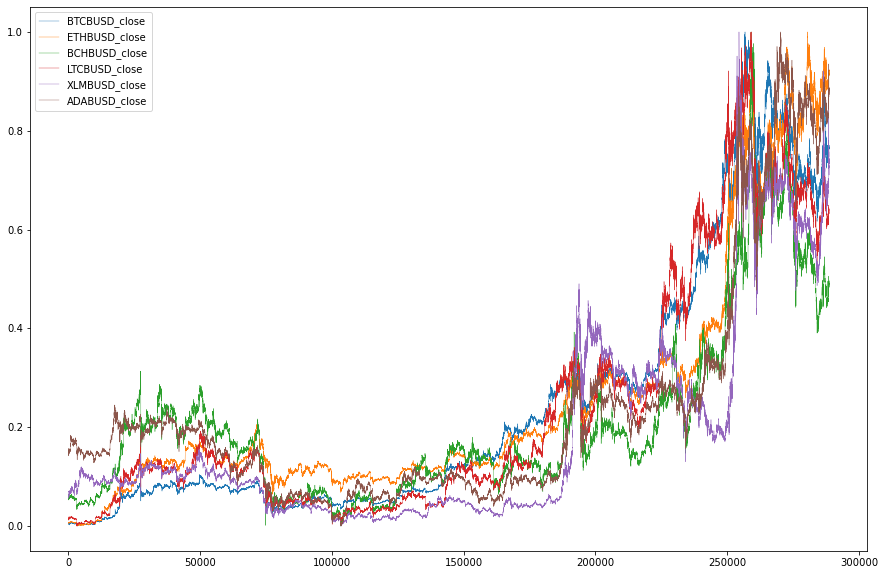

In [195]:
scaled_bin_df_min_max.plot(linewidth=0.4)

#### Z-score

In [240]:
scaled_bin_df_z_score = pd.DataFrame(standard_scaler.fit_transform(binance_df),columns = binance_df.columns)

<AxesSubplot:>

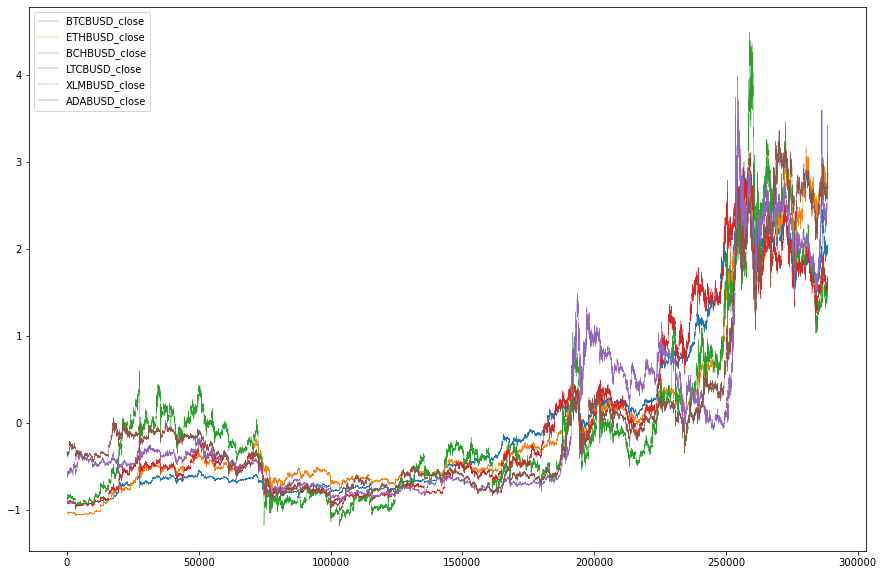

In [252]:
scaled_bin_df_z_score.plot(linewidth=0.4)

<AxesSubplot:>

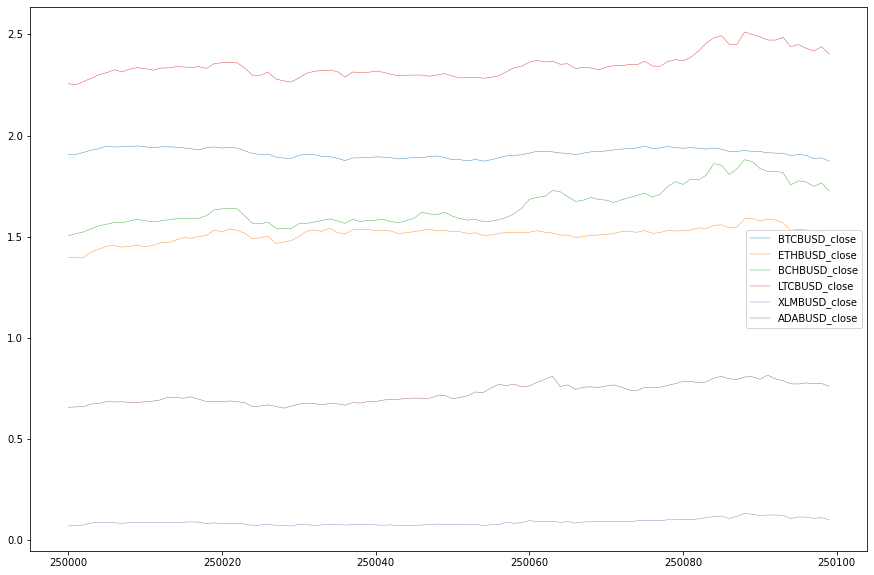

In [253]:
scaled_bin_df_z_score[250000:250100].plot(linewidth=0.4)

#### robust_scaler

In [265]:
scaled_bin_df_robust = pd.DataFrame(robust_scaler.fit_transform(binance_df),columns = binance_df.columns)

<AxesSubplot:>

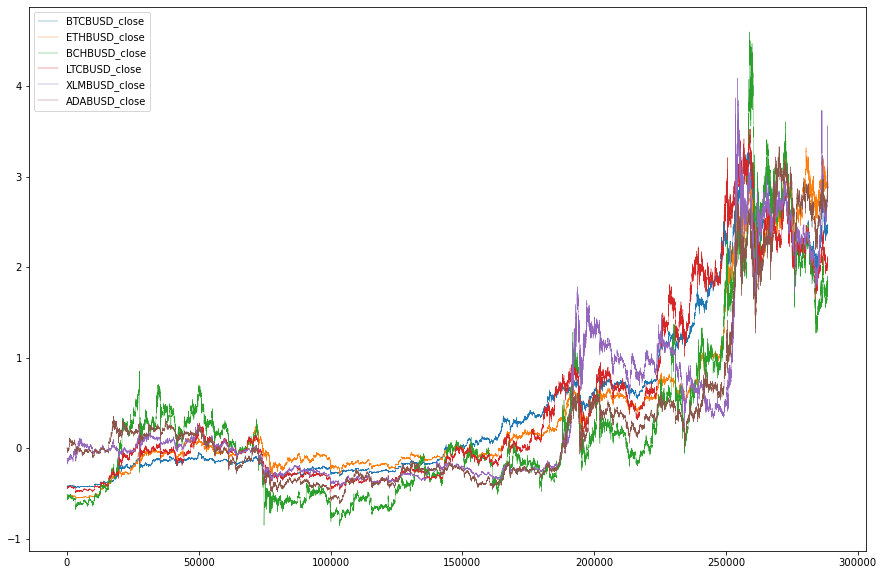

In [266]:
scaled_bin_df_robust.plot(linewidth=0.4)

#### Quantile

In [244]:
scaled_bin_df_quantile = pd.DataFrame(quantile.fit_transform(binance_df),columns = binance_df.columns)

<AxesSubplot:>

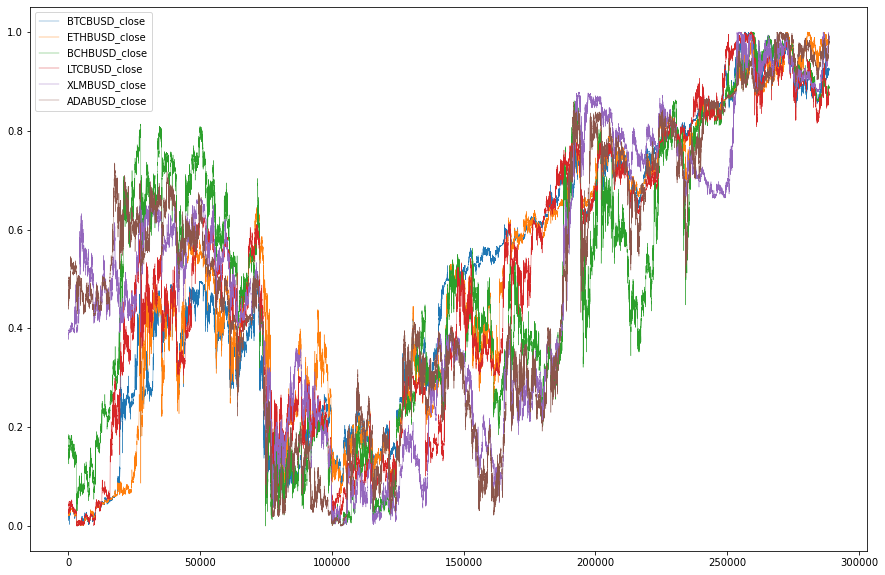

In [245]:
scaled_bin_df_quantile.plot(linewidth=0.4)

### Log scaling

In [323]:
binance_log_df = np.log(binance_df)

<AxesSubplot:xlabel='timestamp'>

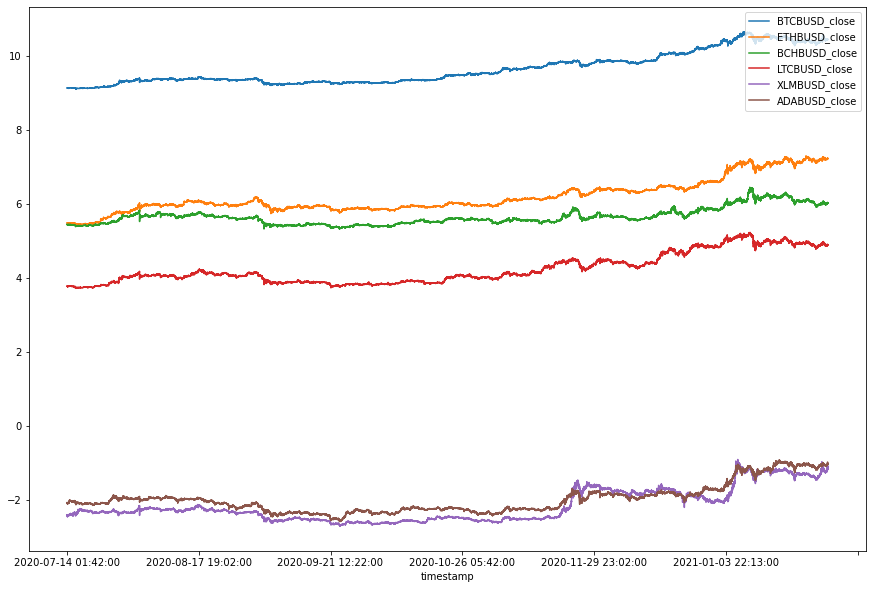

In [278]:
binance_log_df.plot()

In [272]:
scaled_log_df_min_max = pd.DataFrame(min_max_scaler.fit_transform(binance_log_df),columns = binance_df.columns)

<AxesSubplot:>

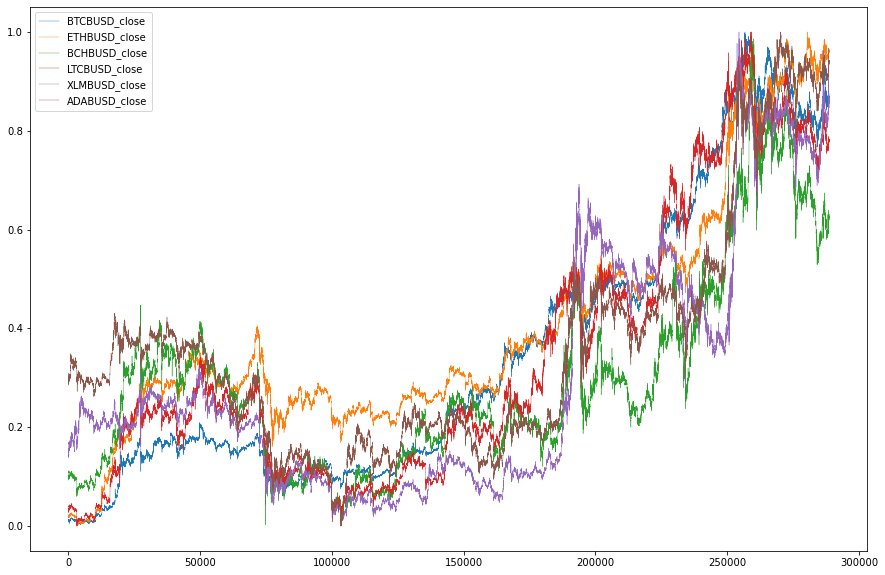

In [275]:
scaled_log_df_min_max.plot(linewidth=0.4)

#### Log moved to zero

In [288]:
binance_log_df[:1]

,BTCBUSD_close,ETHBUSD_close,BCHBUSD_close,LTCBUSD_close,XLMBUSD_close,ADABUSD_close
timestamp,,,,,,
2020-07-14 01:42:00,9.130782,5.480264,5.443932,3.78009,-2.407279,-2.075848


In [289]:
binance_log_df["BTCBUSD_close"] = binance_log_df["BTCBUSD_close"] - 9.130782
binance_log_df["ETHBUSD_close"] = binance_log_df["ETHBUSD_close"] - 5.480264
binance_log_df["BCHBUSD_close"] = binance_log_df["BCHBUSD_close"] - 5.443932
binance_log_df["LTCBUSD_close"] = binance_log_df["LTCBUSD_close"] - 3.78009
binance_log_df["XLMBUSD_close"] = binance_log_df["XLMBUSD_close"] + 2.407279
binance_log_df["ADABUSD_close"] = binance_log_df["ADABUSD_close"] + 2.075848


<AxesSubplot:xlabel='timestamp'>

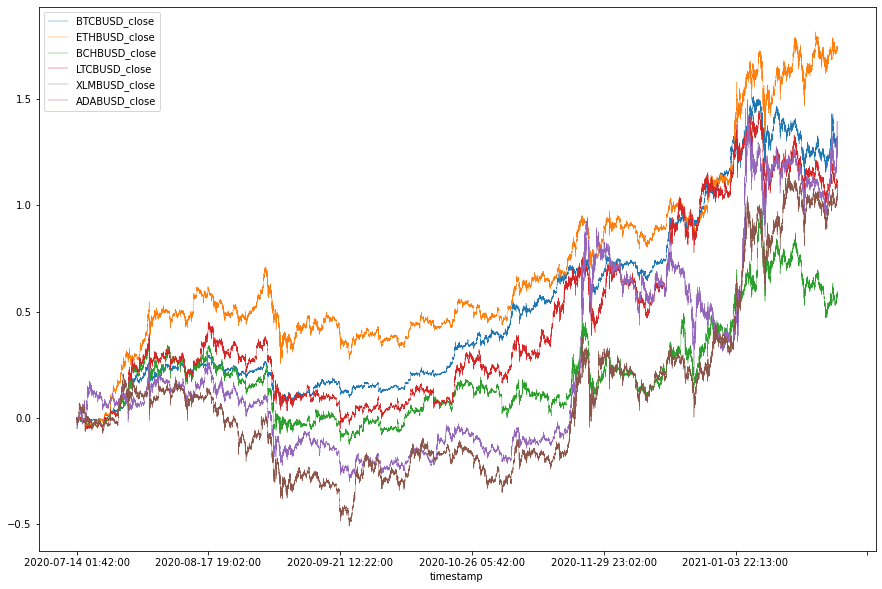

In [291]:
binance_log_df.plot(linewidth=0.4)

In [292]:
binance_log_df = pd.DataFrame(standard_scaler.fit_transform(binance_log_df),columns = binance_df.columns)

<AxesSubplot:>

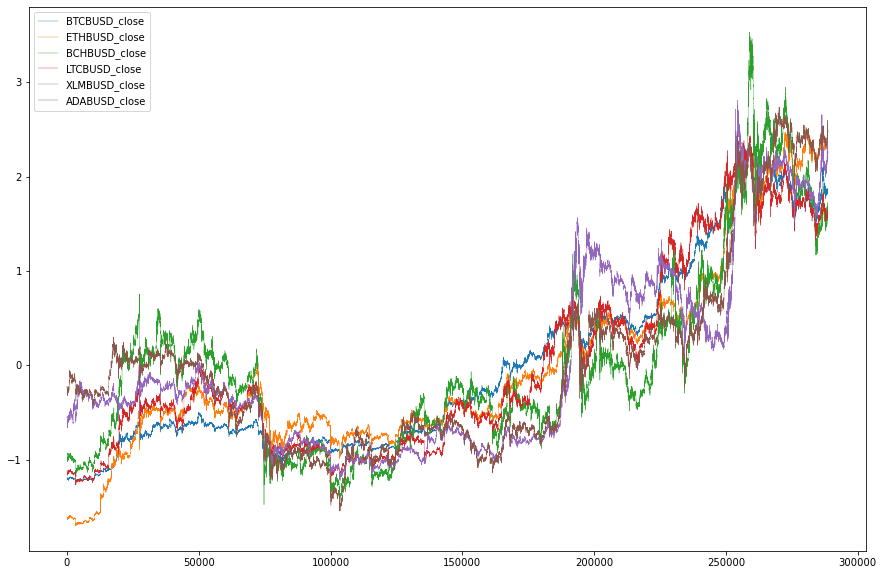

In [293]:
binance_log_df.plot(linewidth=0.4)

### More smaller learning datasets

<AxesSubplot:xlabel='timestamp'>

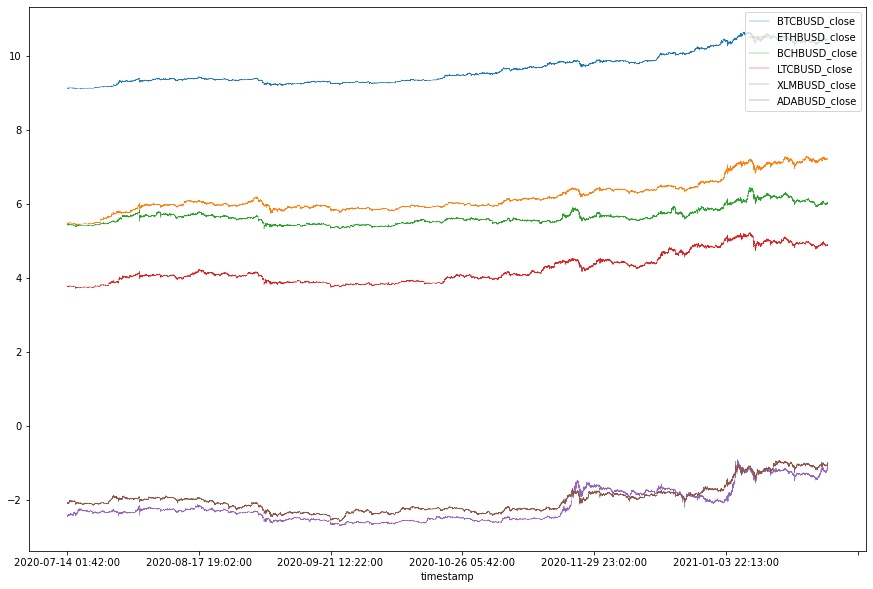

In [324]:
binance_log_df.plot(linewidth=0.4)

<AxesSubplot:xlabel='timestamp'>

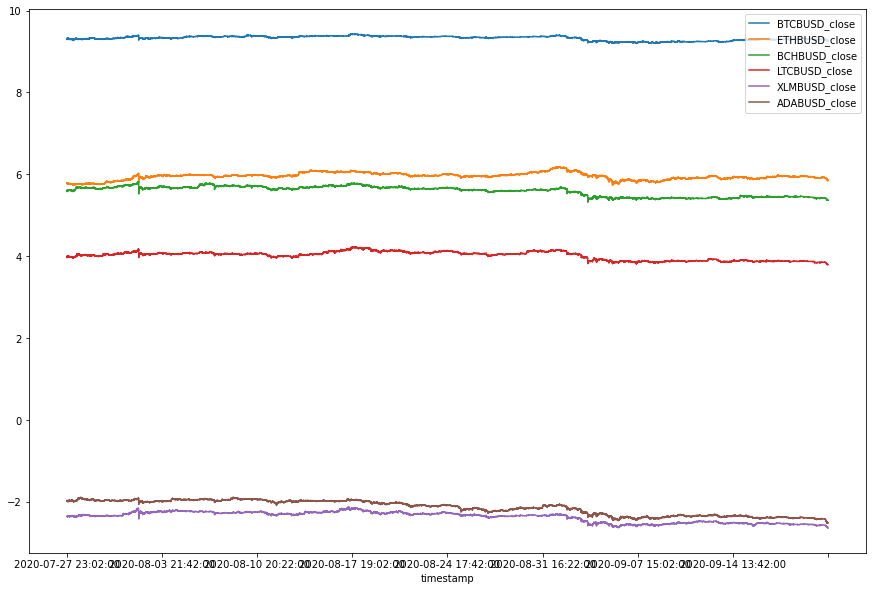

In [406]:
binance_log_df[20000:100000].plot()

In [361]:
binance_train_df_1 = pd.DataFrame(standard_scaler.fit_transform(binance_df[30000:70000]),columns = binance_df.columns)

<AxesSubplot:>

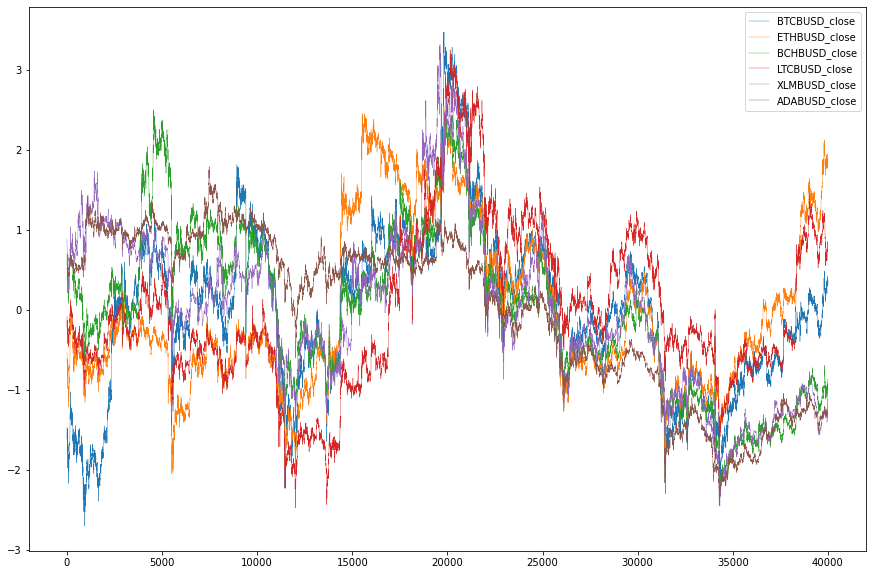

In [362]:
binance_train_df_1.plot(linewidth=0.4)

In [363]:
binance_train_df_log_1 = pd.DataFrame(standard_scaler.fit_transform(binance_log_df[30000:70000]),columns = binance_df.columns)

<AxesSubplot:>

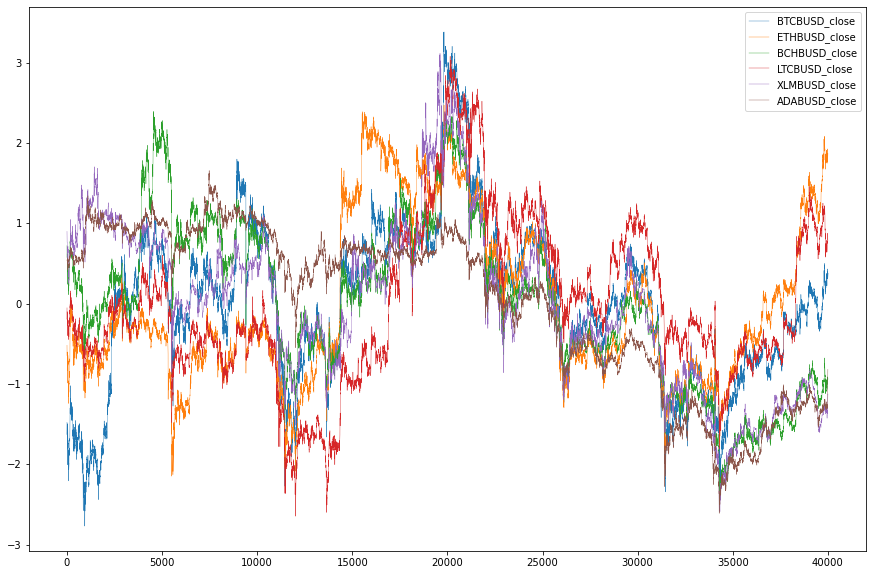

In [364]:
binance_train_df_log_1.plot(linewidth=0.4)

## Scale individually 

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

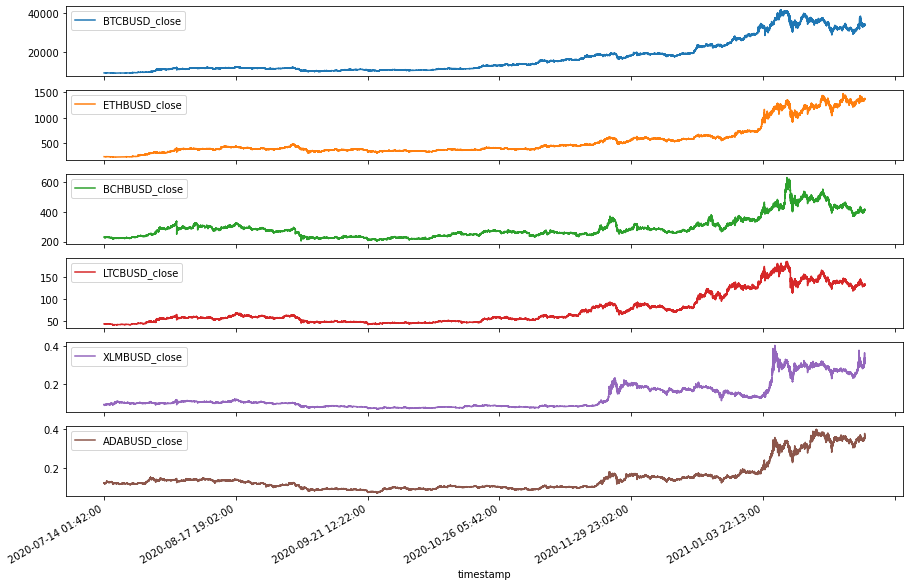

In [387]:
binance_df.plot(subplots=True)

In [ ]:
["BTCBUSD", "ETHBUSD", "XRPBUSD", "BCHBUSD", "LTCBUSD", "XLMBUSD", "ADABUSD"]

In [404]:
binance_df["BTCBUSD_close"] = binance_df["BTCBUSD_close"] / binance_df["BTCBUSD_close"].max()
binance_df["ETHBUSD_close"] = binance_df["ETHBUSD_close"] / binance_df["ETHBUSD_close"].max()
binance_df["BCHBUSD_close"] = binance_df["BCHBUSD_close"] / binance_df["BCHBUSD_close"].max()
binance_df["LTCBUSD_close"] = binance_df["LTCBUSD_close"] / binance_df["LTCBUSD_close"].max()
binance_df["XLMBUSD_close"] = binance_df["XLMBUSD_close"] / binance_df["XLMBUSD_close"].max()
binance_df["ADABUSD_close"] = binance_df["ADABUSD_close"] / binance_df["ADABUSD_close"].max()

<AxesSubplot:xlabel='timestamp'>

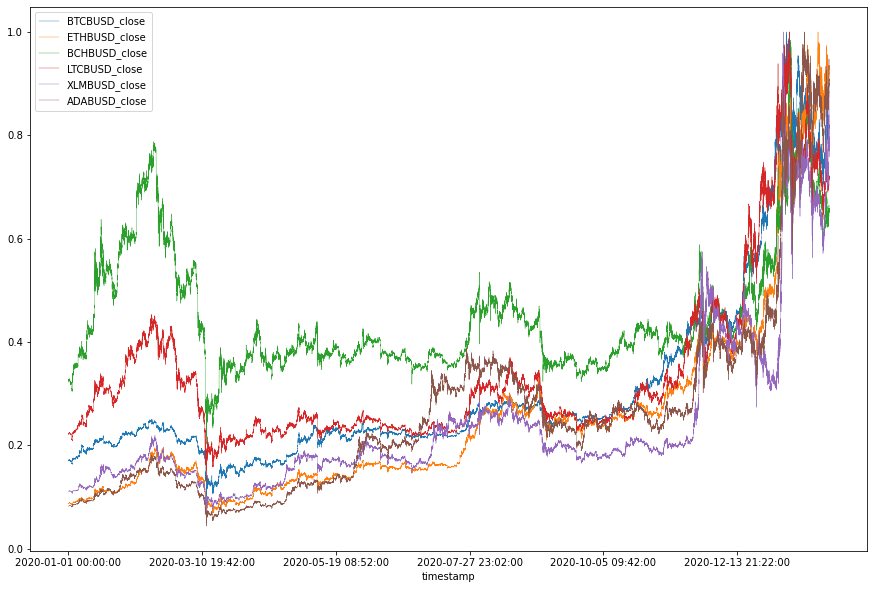

In [405]:
binance_df.plot(linewidth=0.4)